## 0. Mounting drive, importing packages, and file management

In [12]:
#Mount Google Drive for Files
#from google.colab import drive
#drive.mount('/content/drive')

In [13]:
# Importing Packages
import sys
import sklearn
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.base import clone
import numpy as np
import os
import matplotlib as mpl
%matplotlib inline
import matplotlib.pyplot as plt
import urllib.request
import tarfile
from sklearn.svm import SVC 
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix


In [14]:
# Get cwd
current_directory = os.getcwd()

# Create folder for data
fashionmnist_folder = os.path.join(current_directory, "fashion_NMIST")

# Url for training and test data/labels from repo
TRAIN_DATA_URL = "http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/train-images-idx3-ubyte.gz"
TRAIN_LABEL_URL = "http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/train-labels-idx1-ubyte.gz"
TEST_DATA_URL = "http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/t10k-images-idx3-ubyte.gz"
TEST_LABEL_URL = "http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/t10k-labels-idx1-ubyte.gz"

# Paths for training and test data/labels
# Files need to maintain the same name for load_mnist to recognize them by "type"
TRAIN_DATA_PATH = os.path.join(fashionmnist_folder, "train-images-idx3-ubyte.gz")
TRAIN_LABEL_PATH = os.path.join(fashionmnist_folder, "train-labels-idx1-ubyte.gz")
TEST_DATA_PATH = os.path.join(fashionmnist_folder, "t10k-images-idx3-ubyte.gz")
TEST_LABEL_PATH = os.path.join(fashionmnist_folder, "t10k-labels-idx1-ubyte.gz")




## Instructions
We will classify the Fashion MNIST images (https://github.com/zalandoresearch/fashion-mnist).
Within in that page, there are links for the gzipped train and test files.

1. Write fetch_fashionmnist_data(). You'll need to use urllib. Don't need to unzip yourself. You can use mnist_reader.load_mnist() function from the same webpage to load data. 
2. Plot the first 100 images with 10 images per row similar to what we did with MNIST.

We will use the first 1000 examples as training and the next 1000 examples for testing, both from train-images, to save time.  
3. Use SVC(gamma="auto"...) and report the 3-fold cross-validation scores (i.e.,accuracy). Also report test scores.
4. Use SVC(gamma="auto"...) and perform 3-fold cross-validation prediction, and plot the confusion matrix as an image. 

## 1. Fetching data using fetch_fashionmnist_data()

In [15]:
# Fetch fashion-mnist data from URLs, save to folder
def fetch_fashionmnist_data(test_data_url = TEST_DATA_URL, test_data_path = TEST_DATA_PATH, test_label_url = TEST_LABEL_URL, test_label_path = TEST_LABEL_PATH, train_label_url = TRAIN_LABEL_URL, train_label_path = TRAIN_LABEL_PATH, train_data_url = TRAIN_DATA_URL, train_data_path = TRAIN_DATA_PATH):
  
  if not os.path.isdir(fashionmnist_folder):
    os.makedirs(fashionmnist_folder)

  urllib.request.urlretrieve(test_data_url, test_data_path)
  urllib.request.urlretrieve(test_label_url, test_label_path)
  urllib.request.urlretrieve(train_label_url, train_label_path)
  urllib.request.urlretrieve(train_data_url, train_data_path)

fetch_fashionmnist_data()

In [16]:
# load_mnist function from repo
def load_mnist(path, kind='train'):
    import os
    import gzip
    import numpy as np

    """Load MNIST data from `path`"""
    labels_path = os.path.join(path,'%s-labels-idx1-ubyte.gz'% kind)
    images_path = os.path.join(path,'%s-images-idx3-ubyte.gz' % kind)

    with gzip.open(labels_path, 'rb') as lbpath:
      labels = np.frombuffer(lbpath.read(), dtype=np.uint8, offset=8)

    with gzip.open(images_path, 'rb') as imgpath:
      images = np.frombuffer(imgpath.read(), dtype=np.uint8, offset=16).reshape(len(labels), 784)

    return images, labels

In [17]:
# Using load_mnist, create train and test sets
X_train, y_train = load_mnist(fashionmnist_folder, kind='train')
X_test, y_test = load_mnist(fashionmnist_folder, kind='t10k')


# 60000 images, each image is 28 x 28
X_train.shape

(60000, 784)

## 2. Plotting first 100 Images

In [18]:
#Convert pixel vectors to grid of images using function from textbook

def plot_images(instances, images_per_row = 10, **options):
  # Each image is 28x28
  size = 28
  images_per_row = min(len(instances), images_per_row)
  n_rows = (len(instances)-1) // images_per_row + 1
  n_empty = n_rows * images_per_row - len(instances)
  padded_instances = np.concatenate([instances, np.zeros((n_empty, size * size))], axis=0)
  image_grid = padded_instances.reshape((n_rows, images_per_row, size, size))
  big_image = image_grid.transpose(0, 2, 1, 3).reshape(n_rows * size, images_per_row * size)
  plt.imshow(big_image, cmap = mpl.cm.binary, **options)
  plt.axis("off")


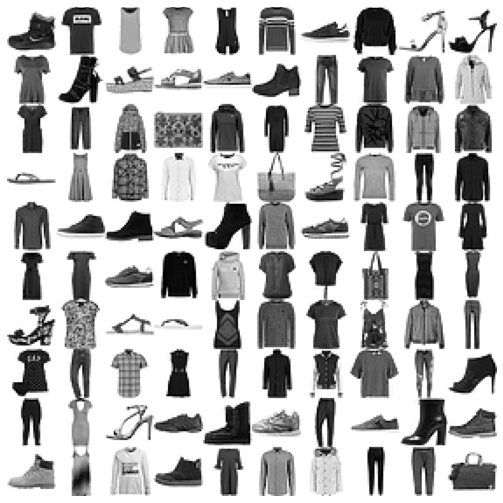

In [19]:
# Plot inline first 100 images from training set as a grid
plt.figure(figsize = (9,9))
example_images = X_train[:100]

plot_images(example_images, images_per_row = 10)
plt.show()

## 3. Support Vector Classifier Training

In [20]:
# Slicing training data into train and test sets

train_data = X_train[:1000]
train_labels = y_train[:1000]
test_data = X_train[1000:2000]
test_labels = y_train[1000:2000]

In [21]:
# Create support vector classifier

# Note that gamma  = "scale" - when using the automatically generated gamma
# the model would always predict all inputs had the most popular label

svm_clf = SVC(gamma = 'auto', kernel = 'linear', random_state = 10)
svm_clf.fit(train_data, train_labels)

SVC(gamma='auto', kernel='linear', random_state=10)

In [22]:
# Training data 3-fold cross validation scores
train_cvscores = cross_val_score(svm_clf, train_data, train_labels, cv=3, scoring = "accuracy")
print("Train 3-fold CV Scores: ", train_cvscores)
print("Average accuracy: ", np.average(train_cvscores))

Train 3-fold CV Scores:  [0.79341317 0.8018018  0.8018018 ]
Average accuracy:  0.7990055924187661


In [23]:
# Test dat 3-fold cross validation scores
test_cvscores = cross_val_score(svm_clf, test_data, test_labels, cv=3, scoring="accuracy")
print("Test 3-fold CV Scores: ", test_cvscores)
print("Average accuracy: ", np.average(test_cvscores))

Test 3-fold CV Scores:  [0.76047904 0.77177177 0.81681682]
Average accuracy:  0.7830225435015855


## 4. Support Vector Classifier Predictions

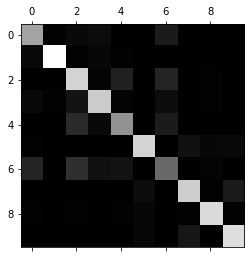

In [24]:
# Create predictions from model
y_train_pred = cross_val_predict(svm_clf, test_data, test_labels, cv=3)

# Create confusion matrix
conf_matrix = confusion_matrix(test_labels, y_train_pred)

# Plot confusion matrix with gray colormap
plt.matshow(conf_matrix, cmap=plt.cm.gray)